In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

df = pd.read_csv("/Users/thewatchman/Downloads/creditcard.csv")[:80_000]
df.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


In [2]:
X = df.drop(columns = ['Time', 'Amount', 'Class']).values
y = df['Class'].values
f"Shapes of X={X.shape} y={y.shape}, #Fraud Cases={y.sum()}"

'Shapes of X=(80000, 28) y=(80000,), #Fraud Cases=196'

In [3]:
from sklearn.linear_model import LogisticRegression

mod = LogisticRegression(class_weight={0: 1, 1: 2}, max_iter=1000)
mod.fit(X, y).predict(X).sum()

171

In [18]:
lr = LogisticRegression()
??lr.score

def min_recall_precision(y_true, y_pred):
    recall = recall_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    return min(recall, precision)

make_scorer(min_recall_precision, greater_is_better=False)

make_scorer(min_recall_precision, greater_is_better=False)

Signature: lr.score(X, y, sample_weight=None)
Source:   
    def score(self, X, y, sample_weight=None):
        """
        Return the mean accuracy on the given test data and labels.

        In multi-label classification, this is the subset accuracy
        which is a harsh metric since you require for each sample that
        each label set be correctly predicted.

        Parameters
        ----------
        X : array-like of shape (n_samples, n_features)
            Test samples.

        y : array-like of shape (n_samples,) or (n_samples, n_outputs)
            True labels for X.

        sample_weight : array-like of shape (n_samples,), default=None
            Sample weights.

        Returns
        -------
        score : float
            Mean accuracy of self.predict(X) wrt. y.
        """
        from .metrics import accuracy_score
        return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
File:      ~/opt/anaconda3/lib/python3.8/site-packages/sklearn/

In [10]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, make_scorer

def min_recall_precision(est, X, y_true, sample_weight=None):
    y_pred = est.predict(X)
    recall = recall_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    return min(recall, precision)

grid = GridSearchCV(
    estimator = LogisticRegression(max_iter=1000),
    param_grid={'class_weight': [{0: 1, 1: v} for v in np.linspace(1, 20, 30)]},
    scoring={'precision': make_scorer(precision_score), 
             'recall_score': make_scorer(recall_score),
             'min_both': min_recall_precision},
    refit='min_both',
    return_train_score=True,
    cv = 10,
    n_jobs=-1
)
#grid.fit(X, y);
grid.fit(X, y, sample_weight=np.log(1 + df['Amount']));

In [14]:
#from sklearn.metrics import precision_score, recall_score

#precision_score(y, grid.predict(X))
#recall_score(y, grid.predict(X))

0.5918367346938775

In [29]:
#pd.set_option("display.max_columns", None)
#pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_class_weight,params,split0_test_precision,split1_test_precision,split2_test_precision,split3_test_precision,split4_test_precision,split5_test_precision,split6_test_precision,split7_test_precision,split8_test_precision,split9_test_precision,mean_test_precision,std_test_precision,rank_test_precision,split0_train_precision,split1_train_precision,split2_train_precision,split3_train_precision,split4_train_precision,split5_train_precision,split6_train_precision,split7_train_precision,split8_train_precision,split9_train_precision,mean_train_precision,std_train_precision,split0_test_recall_score,split1_test_recall_score,split2_test_recall_score,split3_test_recall_score,split4_test_recall_score,split5_test_recall_score,split6_test_recall_score,split7_test_recall_score,split8_test_recall_score,split9_test_recall_score,mean_test_recall_score,std_test_recall_score,rank_test_recall_score,split0_train_recall_score,split1_train_recall_score,split2_train_recall_score,split3_train_recall_score,split4_train_recall_score,split5_train_recall_score,split6_train_recall_score,split7_train_recall_score,split8_train_recall_score,split9_train_recall_score,mean_train_recall_score,std_train_recall_score,split0_test_min_both,split1_test_min_both,split2_test_min_both,split3_test_min_both,split4_test_min_both,split5_test_min_both,split6_test_min_both,split7_test_min_both,split8_test_min_both,split9_test_min_both,mean_test_min_both,std_test_min_both,rank_test_min_both,split0_train_min_both,split1_train_min_both,split2_train_min_both,split3_train_min_both,split4_train_min_both,split5_train_min_both,split6_train_min_both,split7_train_min_both,split8_train_min_both,split9_train_min_both,mean_train_min_both,std_train_min_both
0,4.060637,0.326971,0.028056,0.005798,"{0: 1, 1: 1.0}","{'class_weight': {0: 1, 1: 1.0}}",1.000000,0.463415,0.583333,1.000000,1.000000,0.944444,1.0,0.818182,0.0,1.000000,0.780937,0.319029,29,0.804348,0.917241,0.840909,0.757812,0.759398,0.748148,0.738806,0.765957,0.761905,0.753521,0.784805,0.052689,0.368421,1.0,0.736842,0.473684,0.35,0.85,0.90,0.45,0.00,0.40,0.552895,0.293874,30,0.627119,0.751412,0.627119,0.548023,0.573864,0.573864,0.562500,0.613636,0.636364,0.607955,0.612185,0.054733,0.368421,0.463415,0.583333,0.473684,0.35,0.850000,0.90,0.450000,0.00,0.40,0.483885,0.243144,30,0.627119,0.751412,0.627119,0.548023,0.573864,0.573864,0.562500,0.613636,0.636364,0.607955,0.612185,0.054733
1,3.794964,0.240122,0.026036,0.002575,"{0: 1, 1: 1.6551724137931034}","{'class_weight': {0: 1, 1: 1.6551724137931034}}",1.000000,0.463415,0.583333,1.000000,1.000000,0.944444,1.0,0.833333,1.0,1.000000,0.882453,0.188209,1,0.768212,0.923077,0.828767,0.765517,0.776316,0.770270,0.760274,0.785714,0.778481,0.775641,0.793227,0.046904,0.421053,1.0,0.736842,0.789474,0.35,0.85,0.95,0.50,0.25,0.50,0.634737,0.249916,29,0.655367,0.813559,0.683616,0.627119,0.670455,0.647727,0.630682,0.687500,0.698864,0.687500,0.680239,0.050286,0.421053,0.463415,0.583333,0.789474,0.35,0.850000,0.95,0.500000,0.25,0.50,0.565727,0.215664,29,0.655367,0.813559,0.683616,0.627119,0.670455,0.647727,0.630682,0.687500,0.698864,0.687500,0.680239,0.050286
2,3.503333,0.252325,0.025210,0.002281,"{0: 1, 1: 2.310344827586207}","{'class_weight': {0: 1, 1: 2.310344827586207}}",1.000000,0.463415,0.583333,1.000000,1.000000,0.944444,1.0,0.833333,1.0,1.000000,0.882453,0.188209,1,0.778481,0.919753,0.839744,0.775641,0.786164,0.783439,0.775641,0.792453,0.789157,0.785276,0.802575,0.042850,0.421053,1.0,0.736842,0.842105,0.40,0.85,0.95,0.50,0.25,0.55,0.650000,0.245838,28,0.694915,0.841808,0.740113,0.683616,0.710227,0.698864,0.687500,0.715909,0.744318,0.727273,0.724454,0.043881,0.421053,0.463415,0.583333,0.842105,0.40,0.850000,0.95,0.500000,0.25,0.55,0.580991,0.215860,28,0.694915,0.841808,0.740113,0.683616,0.710227,0.698864,0.687500,0.715909,0.744318,0.727273,0.724454,0.043881
3,3.975185,0.382177,0.027932,0.004157,"{0: 1, 1: 2.9655172413793105}","{'class_weig

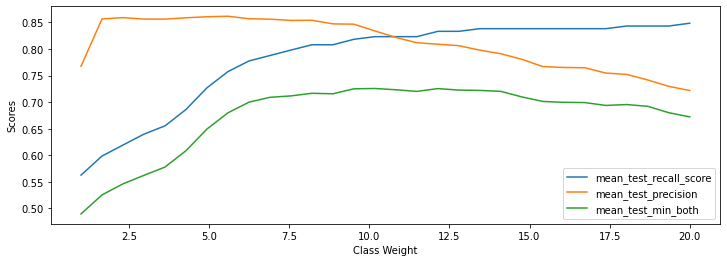

In [11]:
plt.figure(figsize=(12,4))
df_results = pd.DataFrame(grid.cv_results_)
for score in ['mean_test_recall_score', 'mean_test_precision', 'mean_test_min_both']:
    plt.plot([_[1] for _ in df_results['param_class_weight']],
            df_results[score],
            label=score)
plt.xlabel("Class Weight")
plt.ylabel("Scores")

plt.legend();

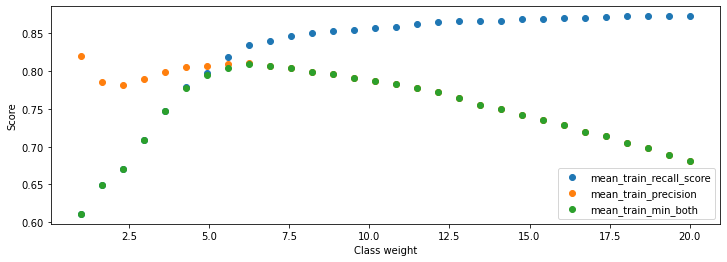

In [12]:
plt.figure(figsize=(12,4))
df_results = pd.DataFrame(grid.cv_results_)
for score in ['mean_train_recall_score', 'mean_train_precision', 'mean_train_min_both']:
    plt.scatter(x=[_[1] for _ in df_results['param_class_weight']],
            y=df_results[score.replace('test', 'train')],
            label=score)
plt.xlabel('Class weight')
plt.ylabel('Score')
plt.legend();

***OUTLIER DETECTION MODEL***

In [15]:
from collections import Counter
from sklearn.ensemble import IsolationForest
mod = IsolationForest().fit(X)
#mod.predict(X)
#Counter(mod.predict(X))
np.where(mod.predict(X) == -1, 1, 0)

array([0, 0, 0, ..., 0, 0, 0])

In [16]:
from sklearn.model_selection import GridSearchCV

def outlier_precision(mod, X, y):
    preds = mod.predict(X)
    return precision_score(y, np.where(preds == -1, 1, 0))

def outlier_recall(mod, X, y):
    preds = mod.predict(X)
    return recall_score(y, np.where(preds == -1, 1, 0))

grid = GridSearchCV(
    estimator=IsolationForest(),
    param_grid={'contamination': np.linspace(0.001, 0.02, 10)},
    scoring={'precision': outlier_precision,
            'recall': outlier_recall},
    refit='precision',
    cv=5,
    n_jobs=-1
)

grid.fit(X, y);

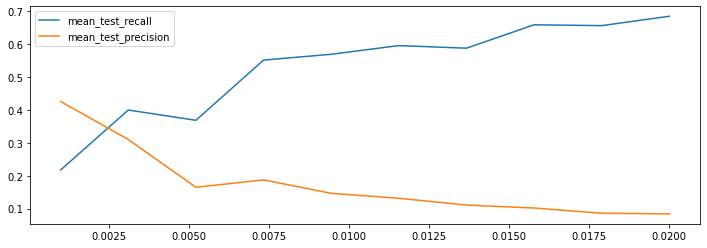

In [17]:
plt.figure(figsize=(12,4))
df_results = pd.DataFrame(grid.cv_results_)
for score in ['mean_test_recall', 'mean_test_precision']:
    plt.plot(df_results['param_contamination'],
            df_results[score],
            label=score)
plt.legend();